# Probability of default on loan

The purpose of this code is to develop a model to predict the probability that a borrower is in default on a loan based on loan and borrower characteristics. 

The data was downloaded from the Credit Risk Dataset uploaded to Kaggle by Lao Tse. https://www.kaggle.com/datasets/laotse/credit-risk-dataset/ 

In [116]:
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [137]:
default=round(mean(df.loan_status),2)*100
default

22.0


The dataset contains a number of continuous and categorical variables. Default is indicated by a binary indicator variable. #default% of loans were in default. 

In [130]:
df = pandas.read_csv("C:/Users/natha/OneDrive/Documents/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


The Employment Length and Interest Rate variables both show missing values. In order to prepare the dataset for analysis, I have dropped any observation with any missing variable. 

In [119]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
person_age,person_age,0.000000
person_income,person_income,0.000000
person_home_ownership,person_home_ownership,0.000000
person_emp_length,person_emp_length,2.747000
loan_intent,loan_intent,0.000000
loan_grade,loan_grade,0.000000
loan_amnt,loan_amnt,0.000000
loan_int_rate,loan_int_rate,9.563856
loan_status,loan_status,0.000000
loan_percent_income,loan_percent_income,0.000000


In [120]:
df=df.dropna()

In [121]:
features=df.drop(["loan_status"],axis=1)
labels=df["loan_status"]

features=pd.get_dummies(features)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [122]:
# rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, class_weight='balanced')

# rf.fit(train_features, train_labels)



In [123]:
gbc = GradientBoostingClassifier(n_estimators = 1000, random_state = 42)

gbc.fit(train_features, train_labels)



GradientBoostingClassifier(n_estimators=1000, random_state=42)

In [124]:
# predictions = rf.predict(test_features)
# errors = abs(predictions - test_labels)
# print('MAE:', round(np.mean(errors), 2))


In [125]:
predictions = gbc.predict(test_features)
errors = abs(predictions - test_labels)
print('MAE:', round(np.mean(errors), 2))
pr=pd.DataFrame(predictions)
pr['pred']=pr[0]
pr['pred_ind']=np.where(pr['pred'] >=0.5 , 1, 0)
pr['actual']=test_labels
act=pd.DataFrame(test_labels)
act.reset_index(drop=True, inplace=True)
pr.reset_index(drop=True, inplace=True)
pred=pd.concat([pr, act], axis=1)

MAE: 0.07


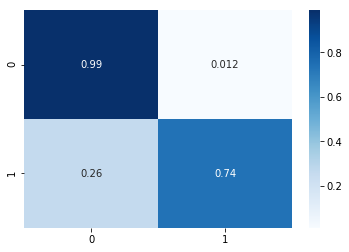

In [126]:
cm =confusion_matrix(pred['loan_status'], pred['pred_ind'])
cmnp = np.array(cm)
temp0 = np.zeros(cmnp.shape)* np.nan
for i in range(cmnp.shape[0]):
    temp = cmnp[i,:]
    temp0[i,:] = temp/np.sum(temp)
cmnp/np.sum(cmnp, axis=1)
sns.heatmap(temp0, annot=True,cmap='Blues')

In [127]:
accuracy_score(pred['loan_status'], pred['pred_ind'])

0.9326815642458101

In [128]:
# area under the ROC curve
roc_auc_score(pred['loan_status'], pred['pred_ind'])

0.8637879236082747

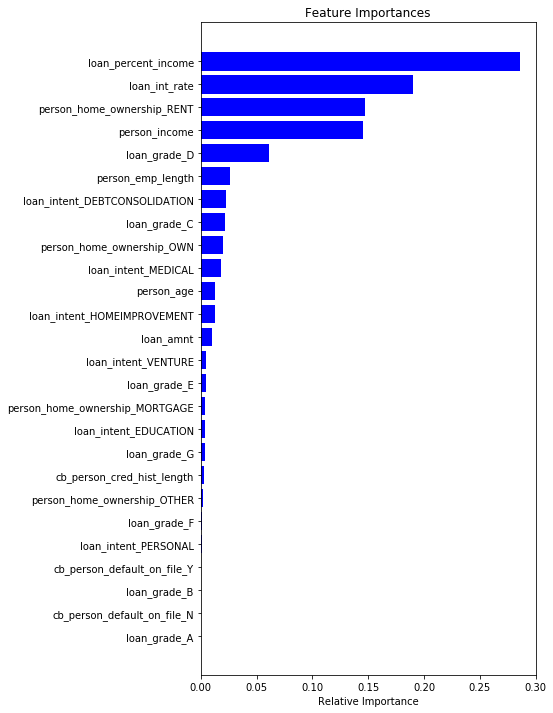

In [129]:
features = features.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()